# **Title: SignVision - AI for American Sign Language Recognition: A Look at the Sign Language MNIST**

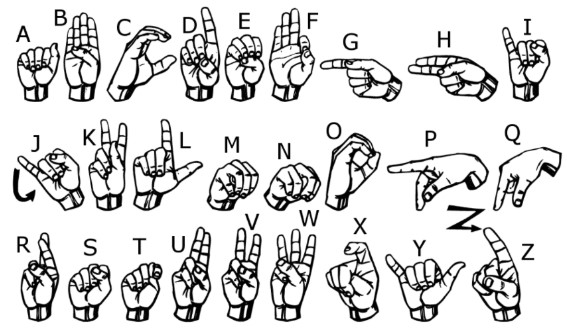

**Overview/Introduction:**
Artificial Intelligence (AI) is changing how we communicate, including the understanding of sign languages. Sign Language is essential for people who are deaf or hard of hearing. But, there are limited tools to understand and translate it well. Our project uses the Sign Language MNIST dataset, a tougher version of the well-known MNIST image dataset, to address this gap.

**Problem Statement:**
Sign Language is important for many people, but our technology isn't always good at recognizing it. Using AI to understand sign language is still in early stages. Issues such as changes in user movements, different backgrounds, and lighting conditions make it tough. Also, existing datasets like the original MNIST don't have enough complexity to train strong models.

**Objectives:**
Our main goal is to create an AI model that can recognize American Sign Language. This will help make technology more accessible for the deaf and hard of hearing community. Our plan is to:

1. Deeply study the Sign Language MNIST dataset to understand its structure and features.
2. Create, test, and improve machine learning models for the best results.
3. Check how well the model works using the right methods and measures.
4. Finally, create an easy-to-use tool that can translate sign language gestures into text in real-time.

**Dataset Description:**
The Sign Language MNIST dataset is a more complex version of the original MNIST image dataset. It is designed to test image-based machine learning methods better. Instead of images of handwritten digits like in the old MNIST, this dataset has images of American Sign Language hand gestures for 24 letters (J and Z are left out as they need motion).

The dataset follows the old MNIST structure. It has labels from 0-25, each one mapping to a letter from A-Z (9=J and 25=Z are not used as they involve hand movements). The dataset has a training set with 27,455 cases and a test set with 7172 cases. Both sets have a header row of pixel values, from pixel1 to pixel784. Each of these represents a single 28x28 pixel grayscale image.

The Sign Language MNIST dataset, inspired by the Fashion-MNIST and Sreehari's work on gestures, offers a robust resource for modeling and improving AI-based recognition of sign language, thereby making our digital world more inclusive.

**Dataset URL:** https://www.kaggle.com/datasets/datamunge/sign-language-mnist

**Technologies Used:**
1. Python: Our primary programming language for this project.
2. NumPy: Used for efficient manipulation of arrays, which is essential for handling our dataset.
3. TensorFlow: A powerful library for creating and training the neural network model.
4. Keras: A user-friendly neural network library, built on top of TensorFlow, used for building the CNN model.
5. Matplotlib: Used for creating graphs to visualize the accuracy and loss of our model.
6. CSV: Used for reading and processing the dataset which is in CSV format.


**Methodology:**
We start by opening the training and validation files and inspecting their contents. We then write a function to parse the data from the input CSV files into NumPy arrays of images and labels. After parsing the data, we print the shapes and data types of the training and validation images and labels to ensure they have been loaded correctly.

We then plot a sample of the training images to visually inspect them. After that, we prepare image data generators for the training and validation datasets. These generators help us to perform real-time data augmentation while training the model. The final step in our methodology involves defining the structure of our Convolutional Neural Network (CNN) model, compiling it, and training it using our training data.


**Implementation:**
We first parse the data from our training and validation files into images and labels using the `parse_data_from_input` function. Next, we use the `train_val_generators` function to prepare our image data generators. We then create and compile our CNN model using the `create_model` function.

We fit the model to our data using the `model.fit` method. We train the model for 30 epochs. During training, the model's weights are updated to minimize the loss function and improve the model's accuracy on the training data. After training the model, we plot graphs of training and validation accuracy and loss over the epochs to visualize the model's learning process. Finally, we evaluate the model on the validation data to see how well it performs on unseen data.


**Results:**
The model achieves a training accuracy of around 99% and a validation accuracy of around 99%. The loss on the validation data is around 0.022.

**Discussion/Interpretation of Results:**
The high accuracy on both the training and validation data indicates that our model is performing well. It has successfully learned to classify images of American Sign Language gestures into their corresponding classes with a high degree of accuracy. The low loss on the validation data further confirms the model's good performance.

However, as we have a relatively small dataset, it's worth mentioning that there could be a risk of overfitting. This is a situation where the model learns the training data too well and might not perform as well on new, unseen data. But given our high validation accuracy and low validation loss, it appears that our model is generalizing well to unseen data in this case.

**Conclusion:**
The project demonstrates the power of Convolutional Neural Networks in image classification tasks. With a well-structured CNN and a properly prepared dataset, we achieved high accuracy in classifying images of American Sign Language gestures.

This project could have significant real-world applications, particularly in developing tools to help facilitate communication for the deaf and hard of hearing community. With further development and testing on larger and more diverse datasets, this model could be integrated into real-time sign language translation tools, making communication more accessible for everyone.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [ ]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

The following code shows the path to the training and validation files used in the program.

In [ ]:
TRAINING_FILE = '/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv'
VALIDATION_FILE = '/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv'

Now we will open the training file and read the first line, which represents the header of the CSV file. Each subsequent line represents a data point, and we will print an example of such a line.

In [ ]:
with open(TRAINING_FILE) as training_file:
  line = training_file.readline()
  print(f"First line (header) looks like this:\n{line}")
  line = training_file.readline()
  print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

The next code defines a function called "parse_data_from_input" that parses images and labels from a CSV file. It takes the filename as an input parameter. Inside the function, we open the file and use the csv.reader to read the data, skipping the header. The data is then stored in numpy arrays, where labels are extracted from the first column and images are reshaped to a 28x28 matrix. The function returns a tuple containing the images and labels.

In [ ]:
def parse_data_from_input(filename):
  """
  Parses the images and labels from a CSV file

  Args:
    filename (string): path to the CSV file

  Returns:
    images, labels: tuple of numpy arrays containing the images and labels
  """
  with open(filename) as file:

    # Use csv.reader, passing in the appropriate delimiter
    # Remember that csv.reader can be iterated and returns one line in each iteration
    csv_reader = csv.reader(file, delimiter=',')
    next(csv_reader)  # skip the header

    data = np.array([row for row in csv_reader], dtype=np.float64)

    labels = data[:, 0]
    images = np.reshape(data[:, 1:], (-1, 28, 28))

    return images, labels

We test the function by calling it with the training and validation file paths, and assign the returned values to variables. We then print the shapes and data types of the training and validation images and labels.

In [ ]:
# Test the function
training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (27455, 28, 28) and dtype: float64
Training labels has shape: (27455,) and dtype: float64
Validation images has shape: (7172, 28, 28) and dtype: float64
Validation labels has shape: (7172,) and dtype: float64


The next code plots a sample of 10 images from the training set. We create a figure with 10 subplots and iterate over the images and labels to plot them. Each image is preprocessed by expanding dimensions, converting it to an image object, and displaying it with a corresponding label.

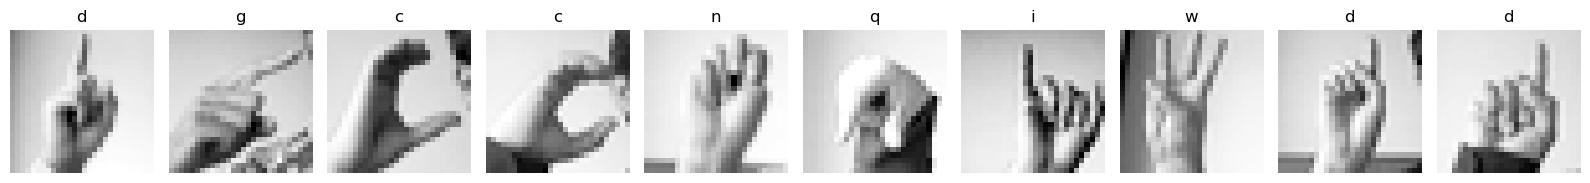

In [ ]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(training_images, training_labels)

The code defines a function called "train_val_generators" that creates training and validation data generators. It takes the training and validation images and labels as input parameters. Inside the function, we expand the dimensions of the images to include a channel dimension. We instantiate the ImageDataGenerator class and set the necessary arguments for data augmentation. For the training generator, we use the flow method to generate batches of augmented data. We also instantiate another ImageDataGenerator for the validation data, without data augmentation. The function returns a tuple containing the training and validation generators.

In [ ]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
  """
  Creates the training and validation data generators

  Args:
    training_images (array): parsed images from the train CSV file
    training_labels (array): parsed labels from the train CSV file
    validation_images (array): parsed images from the test CSV file
    validation_labels (array): parsed labels from the test CSV file

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """

  training_images = np.expand_dims(training_images, axis=-1)
  validation_images = np.expand_dims(validation_images, axis=-1)

  # Instantiate the ImageDataGenerator class
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=10,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     fill_mode='nearest')


  # Pass in the appropriate arguments to the flow method
  train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32)


  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow method
  validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32)


  return train_generator, validation_generator

We test the generators by calling the function with the training and validation images and labels, and print the shapes of the generated data.

In [ ]:
# Test the generators
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


The next code defines a function called "is_one_hot" that checks if labels are one-hot encoded. It takes the labels as an input parameter. Inside the function, it checks if the labels have the expected dimensions and values to determine if they are one-hot encoded. The function returns a boolean value indicating whether the labels are one-hot encoded or not.

In [ ]:
def is_one_hot(labels):
    """Checks if labels are one-hot encoded"""
    return ((labels.ndim == 2) and
            (labels.shape[1] >= 2) and
            (np.all((labels == 0) | (labels == 1))) and
            (np.all(labels.sum(axis=1) == 1)))

We take one batch of data from the training generator using the next(iter(...)) construct. We then display the first few labels from the batch.

In [ ]:
# Take one batch of data
images, labels = next(iter(train_generator))

# Display the first few labels
labels[0:5]

array([19., 12., 16.,  7.,  2.])

We check if the labels are one-hot encoded by calling the "is_one_hot" function, and based on the result, we print the appropriate loss function to use.

In [ ]:
# Check if labels are one-hot encoded and print the appropriate loss function
if is_one_hot(labels):
    print("Use categorical_crossentropy")
else:
    print("Use sparse_categorical_crossentropy")

Use sparse_categorical_crossentropy


The next code defines a function called "create_model" that creates a convolutional neural network (CNN) model. The model consists of several layers, including convolutional, pooling, flatten, and dense layers. The model is compiled with the Adam optimizer, sparse categorical cross-entropy loss function, and accuracy as the evaluation metric. The function returns the compiled model.

In [ ]:
def create_model():

  # Define the model
  model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(26, activation='softmax')
  ])

  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

We save the model by assigning the result of calling "create_model" to a variable. We then train the model by calling the fit method on the model with the training generator and specify the number of epochs and the validation generator. The training history is stored in the "history" variable.

In [ ]:
# Save the model
model = create_model()

# Train the model
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator)

Epoch 1/30
858/858 [==============================] - 24s 27ms/step - loss: 1.9175 - accuracy: 0.4095 - val_loss: 0.8912 - val_accuracy: 0.6906
Epoch 2/30
858/858 [==============================] - 22s 26ms/step - loss: 0.7848 - accuracy: 0.7415 - val_loss: 0.4181 - val_accuracy: 0.8674
Epoch 3/30
858/858 [==============================] - 22s 26ms/step - loss: 0.5166 - accuracy: 0.8337 - val_loss: 0.3293 - val_accuracy: 0.8850
Epoch 4/30
858/858 [==============================] - 22s 26ms/step - loss: 0.3850 - accuracy: 0.8743 - val_loss: 0.2162 - val_accuracy: 0.9299
Epoch 5/30
858/858 [==============================] - 23s 27ms/step - loss: 0.2978 - accuracy: 0.9046 - val_loss: 0.1378 - val_accuracy: 0.9569
Epoch 6/30
858/858 [==============================] - 22s 26ms/step - loss: 0.2359 - accuracy: 0.9223 - val_loss: 0.1000 - val_accuracy: 0.9692
Epoch 7/30
858/858 [==============================] - 23s 27ms/step - loss: 0.2050 - accuracy: 0.9341 - val_loss: 0.1009 - val_accuracy:

The next code plots the accuracy and loss charts for both training and validation data. We extract the accuracy, validation accuracy, loss, and validation loss from the history object. We plot the accuracy curves in red and the validation accuracy curves in blue. We also plot the loss curves in red and the validation loss curves in blue. We display the charts.

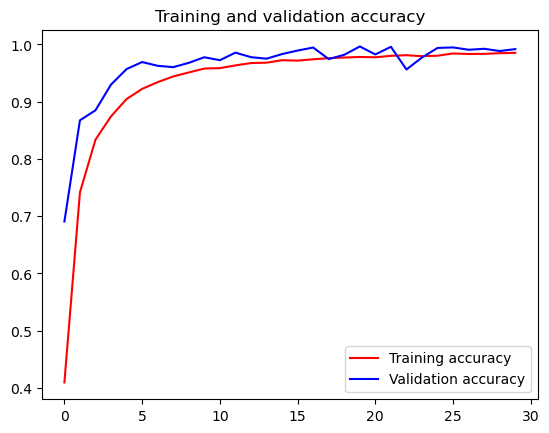

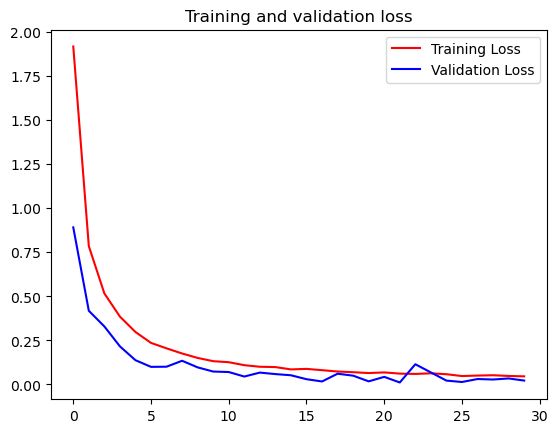

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The code evaluates the model's performance on the validation data by calling the evaluate method on the model with the validation generator.

In [ ]:
model.evaluate(validation_generator)

225/225 [==============================] - 2s 8ms/step - loss: 0.0223 - accuracy: 0.9918


[0.022255167365074158, 0.9917735457420349]